<a href="https://colab.research.google.com/github/shekhar5908/Life-Expectancy/blob/main/lab3_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Find part of of your favorite book and save it in a text file. Load the book and split it into single words.  

#Importing Libraries

In [16]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
import matplotlib.pyplot as plt
import wordcloud



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Fetching the Book

In [17]:
corpus = open("/content/drive/MyDrive/wsa/New Text Document.txt").read().splitlines()
print(corpus)

['His son, who was called Aladdin, was a very careless and idle fellow. He was disobedient to his father and mother, and would go out early in the morning and stay out all day, playing in the streets and public places with idle children of his own age.', '', 'When he was old enough to learn a trade, his father took him into his own shop, and taught him how to use his needle; but all his father’s endeavors to keep him to his work were vain, for no sooner was his back turned than he was gone for that day. Mustapha chastised him; but Aladdin was incorrigible, and his father, to his great grief, was forced to abandon him to his idleness, and was so much troubled about him that he fell sick and died in a few months.', '', 'Aladdin, who was now no longer restrained by the fear of a father, gave himself entirely over to his idle habits, and was never out of the streets from his companions. This course he followed till he was fifteen years old, without giving his mind to any useful pursuit, or

#Tokenizing the words

In [18]:
word = nltk.word_tokenize(corpus[0])
for w in word :
  print(w)

His
son
,
who
was
called
Aladdin
,
was
a
very
careless
and
idle
fellow
.
He
was
disobedient
to
his
father
and
mother
,
and
would
go
out
early
in
the
morning
and
stay
out
all
day
,
playing
in
the
streets
and
public
places
with
idle
children
of
his
own
age
.


# Checking the stop words in english

In [19]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

#Change all words to lower case, remove punctuation and remove stop-words.

In [20]:
# Convert to lowercase and filter non-alphabetic tokens
word_tokens_lower = [word.lower() for word in word if word.isalpha()]


print(word_tokens_lower)
stop_words = set(stopwords.words('english'))
filter_sentences = [w for w in word_tokens_lower if not w in stop_words ]
print(filter_sentences)

['his', 'son', 'who', 'was', 'called', 'aladdin', 'was', 'a', 'very', 'careless', 'and', 'idle', 'fellow', 'he', 'was', 'disobedient', 'to', 'his', 'father', 'and', 'mother', 'and', 'would', 'go', 'out', 'early', 'in', 'the', 'morning', 'and', 'stay', 'out', 'all', 'day', 'playing', 'in', 'the', 'streets', 'and', 'public', 'places', 'with', 'idle', 'children', 'of', 'his', 'own', 'age']
['son', 'called', 'aladdin', 'careless', 'idle', 'fellow', 'disobedient', 'father', 'mother', 'would', 'go', 'early', 'morning', 'stay', 'day', 'playing', 'streets', 'public', 'places', 'idle', 'children', 'age']


#Try using stemming procedure to reduce the different forms of the words to a common form.

In [21]:
nltk.download('omw-1.4')
stemmer = PorterStemmer()
stemm_word = []
for w in filter_sentences:
  root_word =stemmer.stem(w)
  stemm_word.append(root_word)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [22]:
print(stemm_word)

['son', 'call', 'aladdin', 'careless', 'idl', 'fellow', 'disobedi', 'father', 'mother', 'would', 'go', 'earli', 'morn', 'stay', 'day', 'play', 'street', 'public', 'place', 'idl', 'children', 'age']


#Try using stemming procedure to reduce the different forms of the words to a common form.

In [23]:
freq_distribution = nltk.FreqDist(stemm_word)


FreqDist({'idl': 2, 'son': 1, 'call': 1, 'aladdin': 1, 'careless': 1, 'fellow': 1, 'disobedi': 1, 'father': 1, 'mother': 1, 'would': 1, ...})

#Count the total number of occurrences of each word.

In [42]:
freq_distribution

FreqDist({'abandon': 1, 'abashed': 1, 'ability': 1, 'able': 1, 'abode': 1, 'about': 1, 'above': 1, 'absent': 1, 'access': 1, 'according': 1, ...})

#Remove some of the initial elements (short words) and build a word-cloud.

In [24]:
larg_words = dict([k,v]for k,v in freq_distribution.items() if len(k)>3)
larg_words

{'call': 1,
 'aladdin': 1,
 'careless': 1,
 'fellow': 1,
 'disobedi': 1,
 'father': 1,
 'mother': 1,
 'would': 1,
 'earli': 1,
 'morn': 1,
 'stay': 1,
 'play': 1,
 'street': 1,
 'public': 1,
 'place': 1,
 'children': 1}

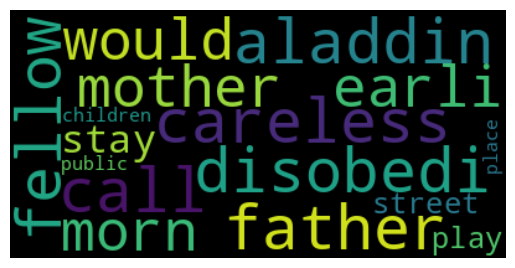

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="black").generate_from_frequencies(larg_words)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

#Divide your book into 3-4 chapters. Treat each chapter as a document.

In [29]:
tot_lines = len(corpus)
chapter1_end = tot_lines//3
chapter2_end = 2*(tot_lines//3)


chapter1 =corpus [:chapter1_end]
chapter2 = corpus[chapter1_end: chapter2_end]
chapter3 = corpus[chapter2_end:]

print(" Chapter 1:")
print('\n'.join(chapter1))
print("\n\n Chapter 2:")
print("\n".join(chapter2))
print("\n\n Chapter 3:")
print('n'.join(chapter3))

 Chapter 1:
His son, who was called Aladdin, was a very careless and idle fellow. He was disobedient to his father and mother, and would go out early in the morning and stay out all day, playing in the streets and public places with idle children of his own age.

When he was old enough to learn a trade, his father took him into his own shop, and taught him how to use his needle; but all his father’s endeavors to keep him to his work were vain, for no sooner was his back turned than he was gone for that day. Mustapha chastised him; but Aladdin was incorrigible, and his father, to his great grief, was forced to abandon him to his idleness, and was so much troubled about him that he fell sick and died in a few months.

Aladdin, who was now no longer restrained by the fear of a father, gave himself entirely over to his idle habits, and was never out of the streets from his companions. This course he followed till he was fifteen years old, without giving his mind to any useful pursuit, or t

#Split each document into words (use lower case, stemming, etc.)

In [30]:
nltk.download("punkt")

port_stemm = PorterStemmer()

def preprocessed_and_tokenize(text):

  text_lower = text.lower()

  tokens = nltk.word_tokenize(text_lower)

  stemmed_tokens = [port_stemm.stem(token) for token in tokens]

  return stemmed_tokens

processed_chapter1 = preprocessed_and_tokenize("n".join(chapter1))
processed_chapter2 = preprocessed_and_tokenize("n".join(chapter2))
processed_chapter3 = preprocessed_and_tokenize("n".join(chapter3))

print ("processed Chapter1: ")
print(processed_chapter1)
print ("\nprocessed Chapter2: ")
print(processed_chapter2)
print ("\nprocessed Chapter3: ")
print(processed_chapter3)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


processed Chapter1: 
['hi', 'son', ',', 'who', 'wa', 'call', 'aladdin', ',', 'wa', 'a', 'veri', 'careless', 'and', 'idl', 'fellow', '.', 'he', 'wa', 'disobedi', 'to', 'hi', 'father', 'and', 'mother', ',', 'and', 'would', 'go', 'out', 'earli', 'in', 'the', 'morn', 'and', 'stay', 'out', 'all', 'day', ',', 'play', 'in', 'the', 'street', 'and', 'public', 'place', 'with', 'idl', 'children', 'of', 'hi', 'own', 'age.nnwhen', 'he', 'wa', 'old', 'enough', 'to', 'learn', 'a', 'trade', ',', 'hi', 'father', 'took', 'him', 'into', 'hi', 'own', 'shop', ',', 'and', 'taught', 'him', 'how', 'to', 'use', 'hi', 'needl', ';', 'but', 'all', 'hi', 'father', '’', 's', 'endeavor', 'to', 'keep', 'him', 'to', 'hi', 'work', 'were', 'vain', ',', 'for', 'no', 'sooner', 'wa', 'hi', 'back', 'turn', 'than', 'he', 'wa', 'gone', 'for', 'that', 'day', '.', 'mustapha', 'chastis', 'him', ';', 'but', 'aladdin', 'wa', 'incorrig', ',', 'and', 'hi', 'father', ',', 'to', 'hi', 'great', 'grief', ',', 'wa', 'forc', 'to', 'abando

#Determine the tf-idf weights of all words in all documents.

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

docs = ["".join(chapter1),"".join(chapter2),"".join(chapter3)]

tfidf_vector = TfidfVectorizer()
values = tfidf_vector.fit_transform(docs)
feature_name = tfidf_vector.get_feature_names_out()
print(pd.DataFrame(values.toarray(),columns=feature_name))

    abandon   abashed   ability      able     abode     about     above  \
0  0.006428  0.006428  0.000000  0.009777  0.006428  0.015186  0.004889   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.003123  0.000000   
2  0.000000  0.000000  0.005439  0.004137  0.000000  0.006425  0.004137   

     absent    access  according  ...    yellow       yes  yesterday  \
0  0.006428  0.006428   0.004889  ...  0.000000  0.006428   0.000000   
1  0.000000  0.000000   0.000000  ...  0.010576  0.000000   0.010576   
2  0.000000  0.000000   0.020683  ...  0.000000  0.000000   0.000000   

        yet       you     young      your     yours  yourself     youth  
0  0.004889  0.223989  0.000000  0.060743  0.006428  0.012856  0.009777  
1  0.008043  0.106187  0.005288  0.018739  0.000000  0.000000  0.004022  
2  0.000000  0.067462  0.000000  0.019275  0.000000  0.000000  0.000000  

[3 rows x 1473 columns]


#For each document separately build a word cloud using obtained tf-idf weights.  

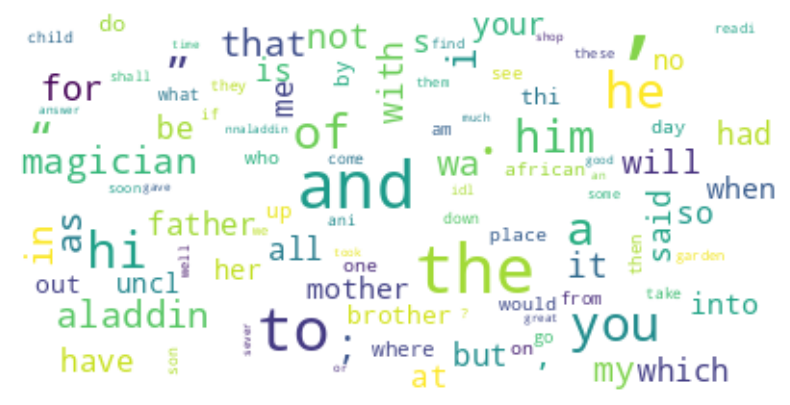

In [38]:
freq_distribution = nltk.FreqDist(processed_chapter1)
freq_distribution
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(freq_distribution)
plt.figure(figsize= (10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

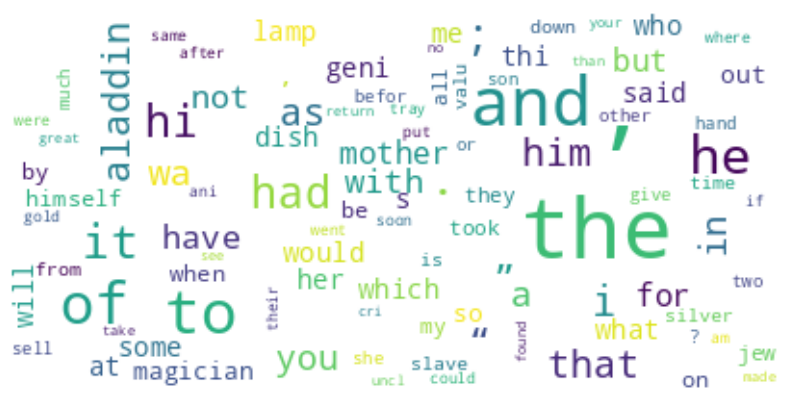

In [39]:
freq_distribution = nltk.FreqDist(processed_chapter2)
freq_distribution
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(freq_distribution)
plt.figure(figsize= (10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

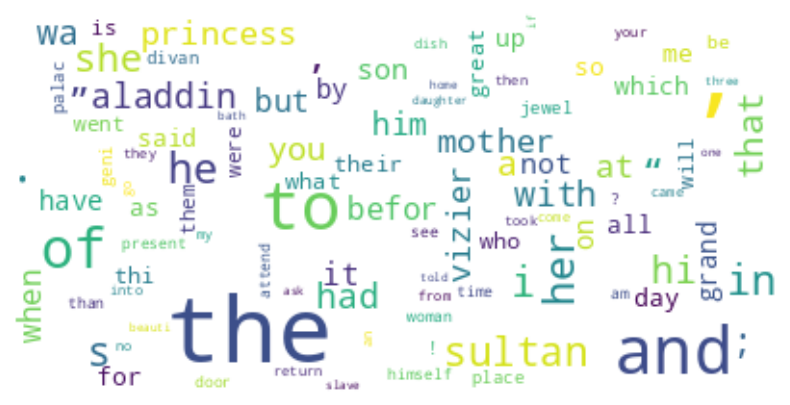

In [40]:
freq_distribution = nltk.FreqDist(processed_chapter3)
freq_distribution
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(freq_distribution)
plt.figure(figsize= (10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Build a word cloud based on tf-idf weights for the entire book

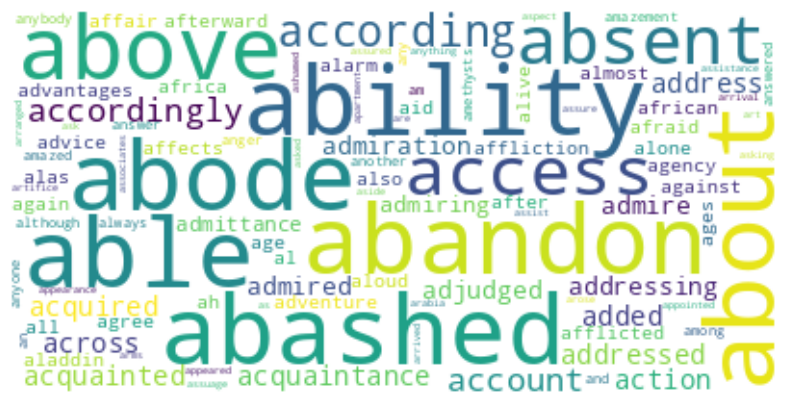

In [41]:
freq_distribution = nltk.FreqDist(feature_name)
freq_distribution
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate_from_frequencies(freq_distribution)
plt.figure(figsize= (10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()